In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data
data = pd.read_csv('F:\CODSOFT\Iris\IRIS.csv')
df = pd.DataFrame(data)
print("First few rows of the dataset:")
df.head(10)


First few rows of the dataset:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


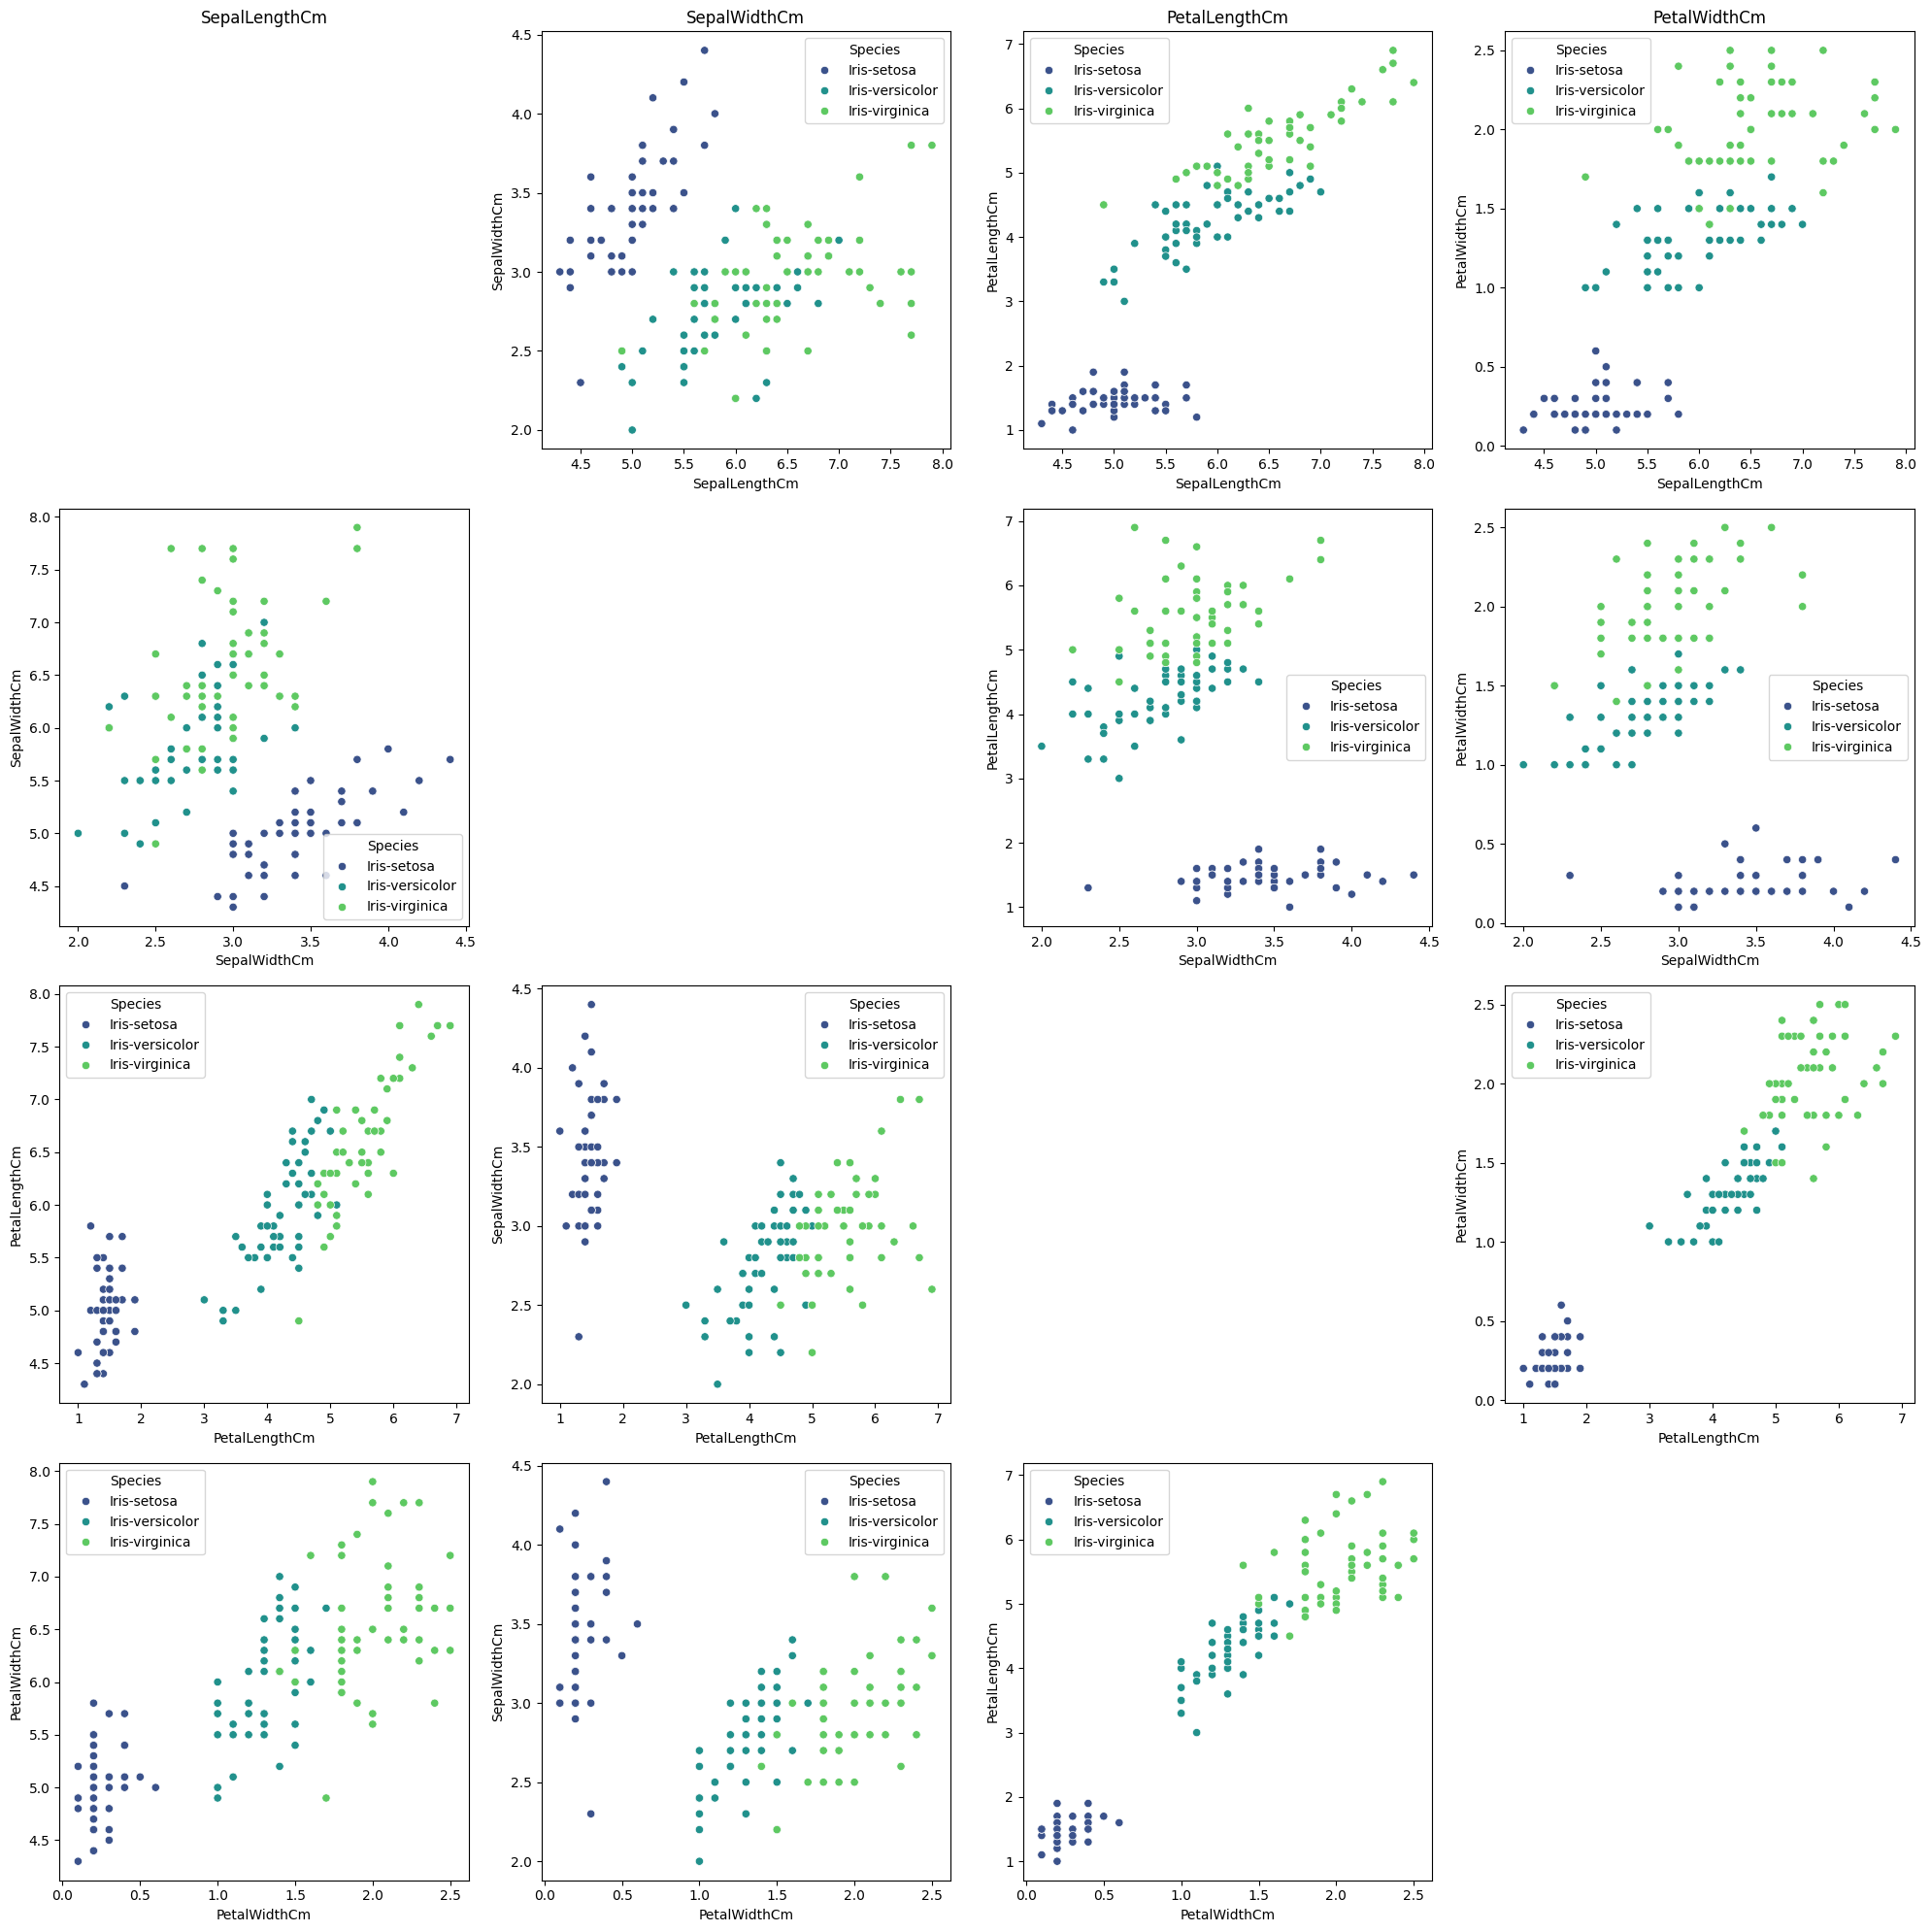

In [4]:

X = df.drop(columns=['Species'])
y = df['Species']
features = X.columns
n_features = len(features)
fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i != j:
            sns.scatterplot(data=df, x=feature1, y=feature2, hue='Species', palette='viridis', ax=axes[i, j])
        else:
            axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(feature2)
        if j == 0:
            axes[i, j].set_ylabel(feature1)
plt.tight_layout()
plt.show()


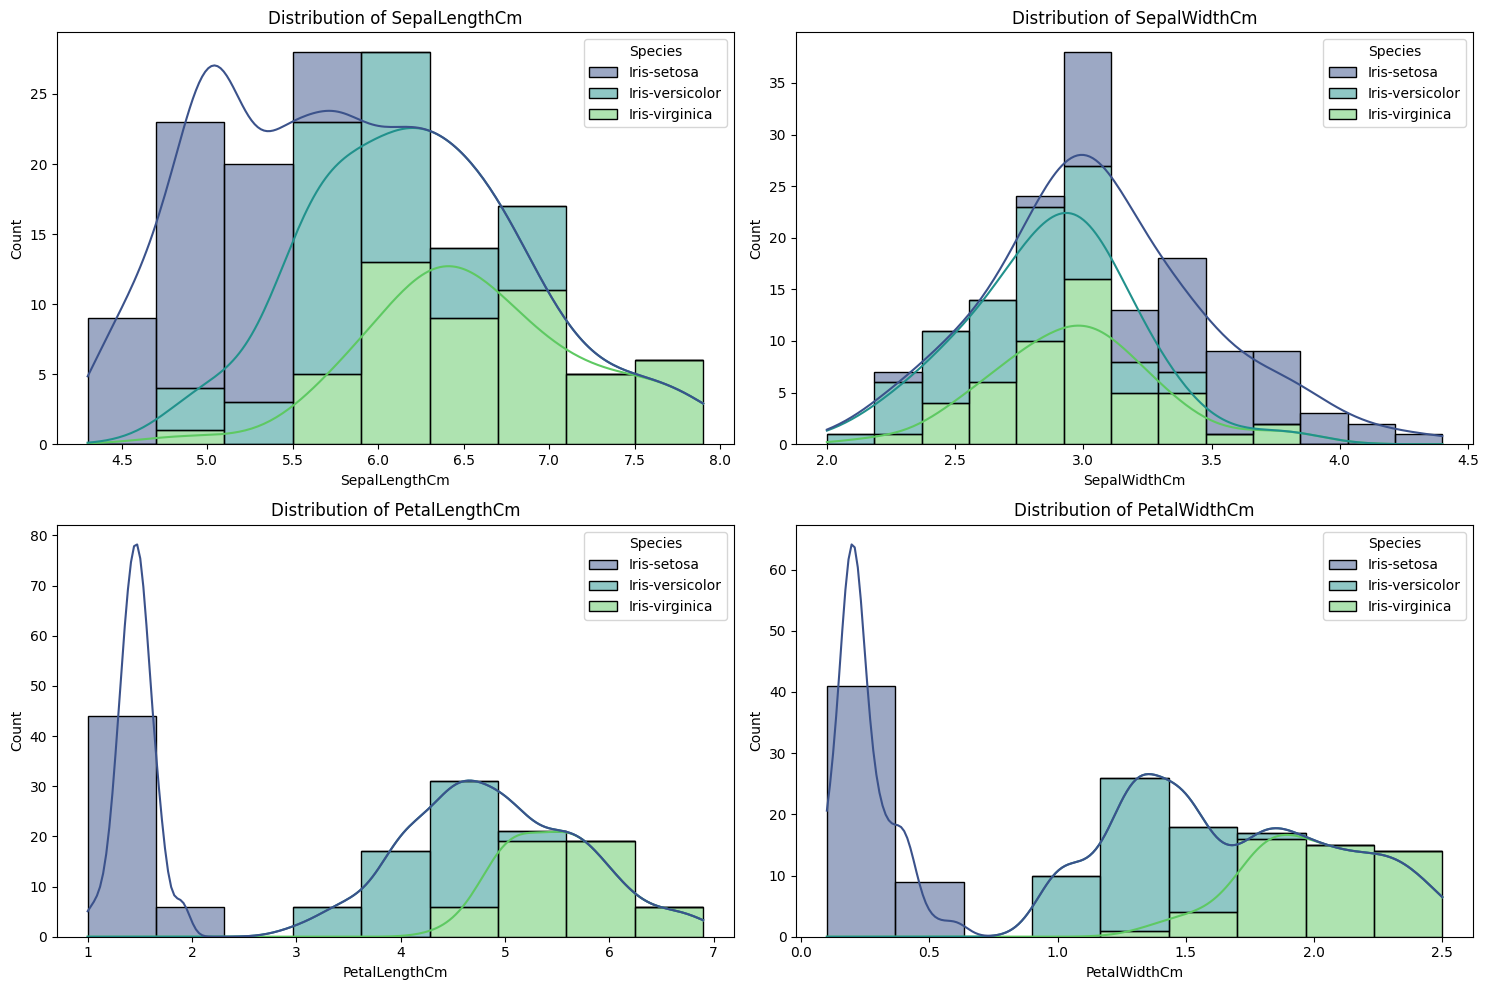

In [5]:

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(X.columns):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(data=df, x=feature, hue='Species', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


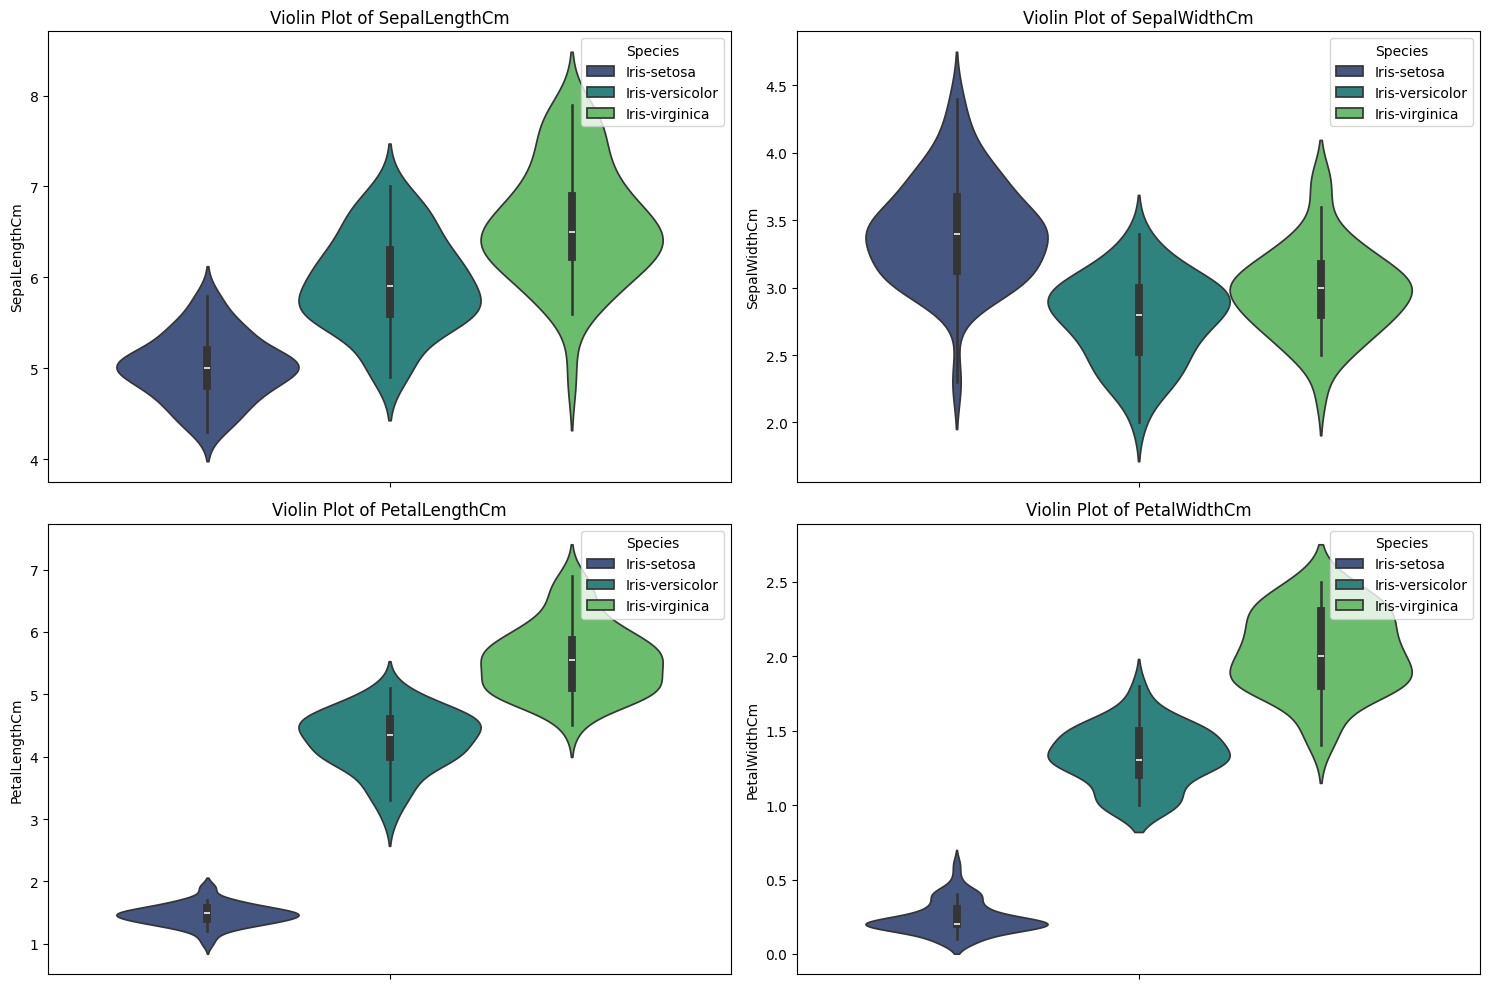

In [6]:

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(X.columns):
    plt.subplot(2, 2, idx + 1)
    sns.violinplot(data=df, hue='Species', y=feature, palette='viridis')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


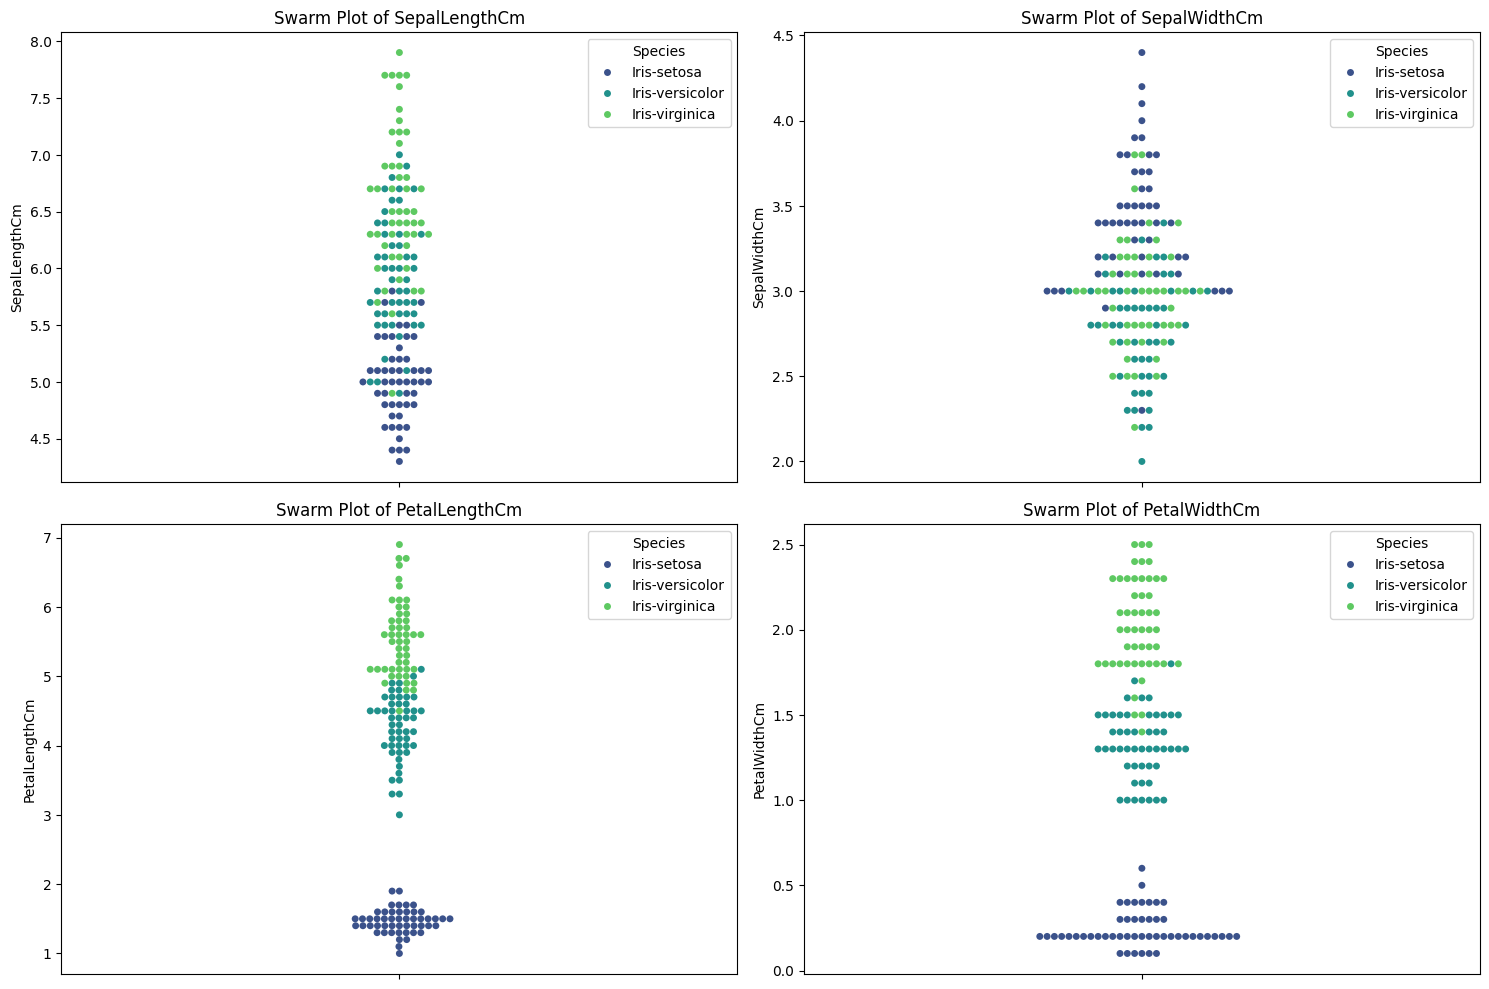

In [7]:

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(X.columns):
    plt.subplot(2, 2, idx + 1)
    sns.swarmplot(data=df, hue='Species', y=feature, palette='viridis')
    plt.title(f'Swarm Plot of {feature}')
plt.tight_layout()
plt.show()


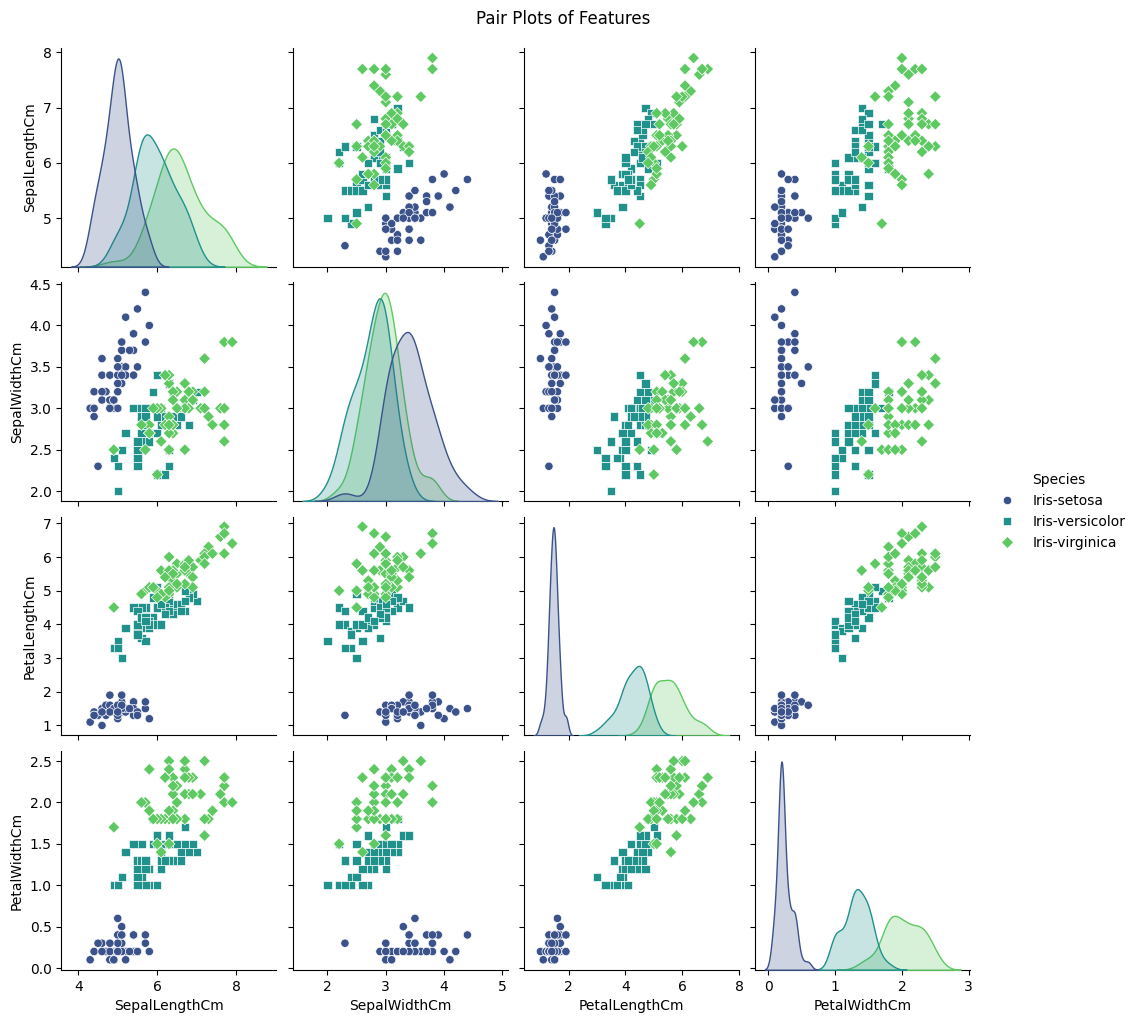

In [8]:

sns.pairplot(df, hue='Species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show()


In [9]:

X = df.drop(columns=['Species'])
y = df['Species']
target_names = y.unique()
target_map = {name: idx for idx, name in enumerate(target_names)}
y = y.map(target_map)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
best_k = k_range[np.argmax(k_scores)]
print(f'Best k value: {best_k}')
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))


Best k value: 11
Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



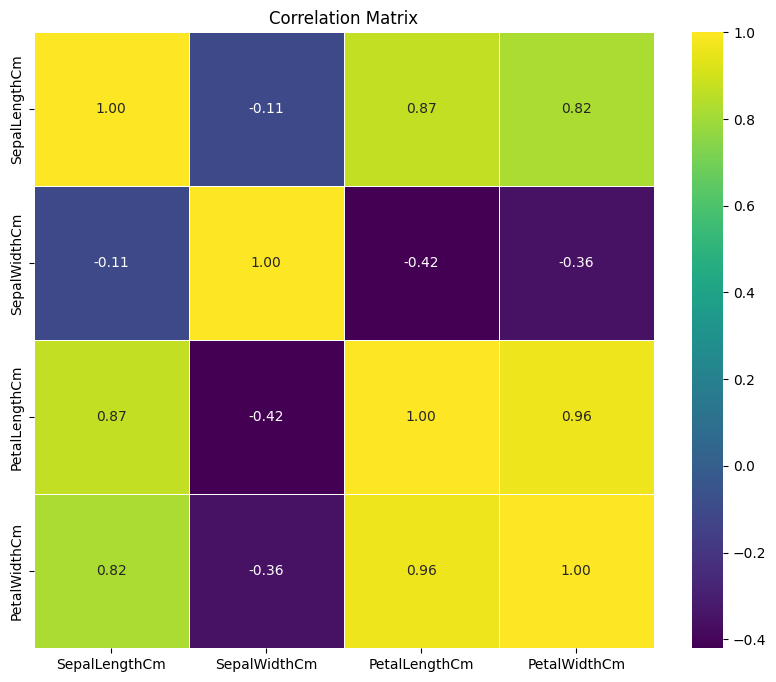

In [10]:

corr = df.drop(columns=['Species']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:

new_data = pd.DataFrame({
    "SepalLengthCm":[5.7],
    "SepalWidthCm":[3.7],
    "PetalLengthCm":[4.5],
    "PetalWidthCm":[1.3]
})
new_data_standardized = scaler.transform(new_data)
new_prediction = classifier.predict(new_data_standardized)
predicted_species = target_names[new_prediction[0]]
print(f'Predicted species for the new data: {predicted_species}')


Predicted species for the new data: Iris-versicolor
